In [1]:
import pandas as pd
data = pd.read_csv('tips.csv')
data.head(10)


,total_bill,tip,sex,smoker,day,time,size,id
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2
2,21.01,3.50,Male,No,Sun,Dinner,3,3
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,5
5,25.29,4.71,Male,No,Sun,Dinner,4,6
6,8.77,2.00,Male,No,Sun,Dinner,2,7
7,26.88,3.12,Male,No,Sun,Dinner,4,8
8,15.04,1.96,Male,No,Sun,Dinner,2,9
9,14.78,3.23,Male,No,Sun,Dinner,2,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   id          244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [3]:
#查看缺失值列
na_records = data.isnull().any(axis=0) #
print(na_records.sum()) #空值的总记录数
print(na_records[na_records]==True) #
#没有缺少值,不需要处理

0
Series([], dtype: bool)


In [4]:
#异常值处理
import numpy as np
def process_outlier(sub_data,each_col):  #定义该函数用来判断每列是否异常，并将异常列填充为均值
    _mean = sub_data[each_col].mean()  
    _std = sub_data[each_col].std()  #这两列求出该列的均值和标准差
    scope_min,scope_max = _mean-50*_std,_mean+50*_std  #通过均值+-50个标准差来计算正常数据分布的最小值和最大值
    is_outlier = (sub_data[each_col] <scope_min)|(sub_data[each_col] >scope_max)  #判断是否异常的条件，当该列内的数据小于正常分布的最小值或大于最大数值时标记True否则标记False
    sub_data[is_outlier] = _mean  #将异常的数据填充为均值
    print(np.sum(is_outlier))  #打印异常记录的数量
    return sub_data
    #结果没有异常值被处理

In [5]:
data['total_bill']=process_outlier(data[['total_bill']],'total_bill') 

0


C:\Users\周永都\AppData\Local\Temp\ipykernel_16696\2649716268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[is_outlier] = _mean  #将异常的数据填充为均值
C:\Users\周永都\AppData\Local\Temp\ipykernel_16696\2649716268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[is_outlier] = _mean  #将异常的数据填充为均值


In [6]:
data['tip']=process_outlier(data[['tip']],'tip')

0


C:\Users\周永都\AppData\Local\Temp\ipykernel_16696\2649716268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[is_outlier] = _mean  #将异常的数据填充为均值
C:\Users\周永都\AppData\Local\Temp\ipykernel_16696\2649716268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data[is_outlier] = _mean  #将异常的数据填充为均值


In [7]:
#查看重复值
data[data.duplicated()]


,total_bill,tip,sex,smoker,day,time,size,id


In [8]:
data = data.drop_duplicates()       

In [9]:
#[244 rows x 7 columns] 去除之前
#[243 rows x 7 columns] 去除之后
print(data) 

     total_bill   tip     sex smoker   day    time  size   id
0         16.99  1.01  Female     No   Sun  Dinner     2    1
1         10.34  1.66    Male     No   Sun  Dinner     3    2
2         21.01  3.50    Male     No   Sun  Dinner     3    3
3         23.68  3.31    Male     No   Sun  Dinner     2    4
4         24.59  3.61  Female     No   Sun  Dinner     4    5
..          ...   ...     ...    ...   ...     ...   ...  ...
239       29.03  5.92    Male     No   Sat  Dinner     3  240
240       27.18  2.00  Female    Yes   Sat  Dinner     2  241
241       22.67  2.00    Male    Yes   Sat  Dinner     2  242
242       17.82  1.75    Male     No   Sat  Dinner     2  243
243       18.78  3.00  Female     No  Thur  Dinner     2  244

[244 rows x 8 columns]


In [10]:
#标准化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss_model = StandardScaler()
data['total_bill'] = ss_model.fit_transform(data[['total_bill']])
print(data[['total_bill']].describe().T.round(5))

            count  mean      std      min      25%     50%      75%      max
total_bill  244.0  -0.0  1.00206 -1.88155 -0.72471 -0.2241  0.48869  3.49207


In [11]:
#二元化
from sklearn.preprocessing import Binarizer
bin_model = Binarizer(threshold=data['total_bill'].mean())
data['tip'] = bin_model.fit_transform(data[['total_bill']])
print(data['tip'].head(5))

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: tip, dtype: float64


In [12]:
#离散化
data["total_bill"] = pd.cut(data["tip"],2,labels=["合理小费","高额小费"])
print(data["total_bill"].head(5))

0    合理小费
1    合理小费
2    高额小费
3    高额小费
4    高额小费
Name: total_bill, dtype: category
Categories (2, object): ['合理小费' < '高额小费']


In [13]:
#OneHotEncode转换
#用cut进行一个分类，然后用1去代表这列所显示的
object_data=data[['tip']]
convert_data=pd.get_dummies(object_data)
print(convert_data.head(5))


   tip
0  0.0
1  0.0
2  1.0
3  1.0
4  1.0


In [14]:
#导入相关的绘图库
import  matplotlib.pyplot as  plt
plt.rc("font",family="SimHei",size="14")
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import  numpy as  np
%matplotlib inline
%config InlineBackend.figure_format='retina'

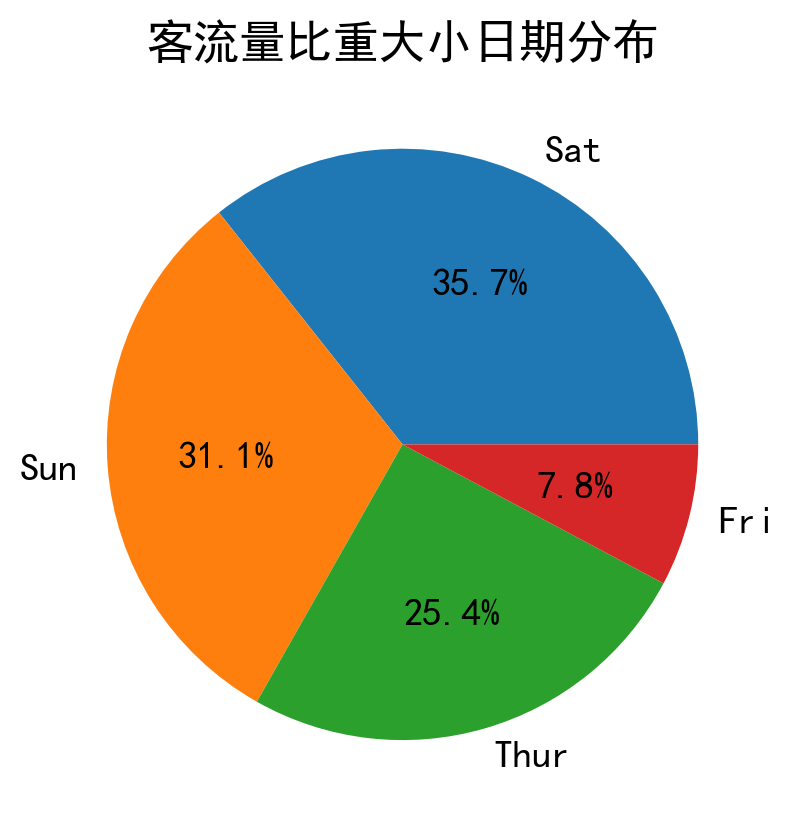

In [15]:
#饼图
# 总结：客流量在 Sat Sun Thur 居多，Fri较少 其他时间不营业。
plt.pie(x=data['day'].value_counts(),labels=data['day'].value_counts().index,autopct='%.1f%%',)
plt.title(u'客流量比重大小日期分布')
plt. show()

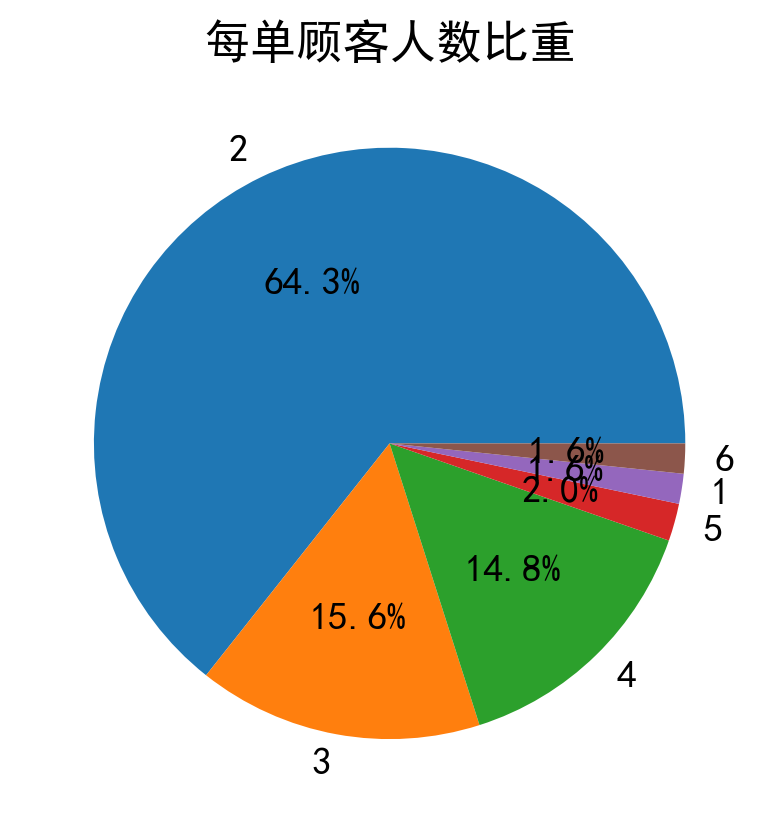

In [16]:
#饼图
#总结： 两人同行占主要比重，3-4人同样占着不少比重
plt.pie(x=data['size'].value_counts(),labels=data['size'].value_counts().index,autopct='%2.1f%%',)
plt.title(u'每单顾客人数比重')
plt. show()

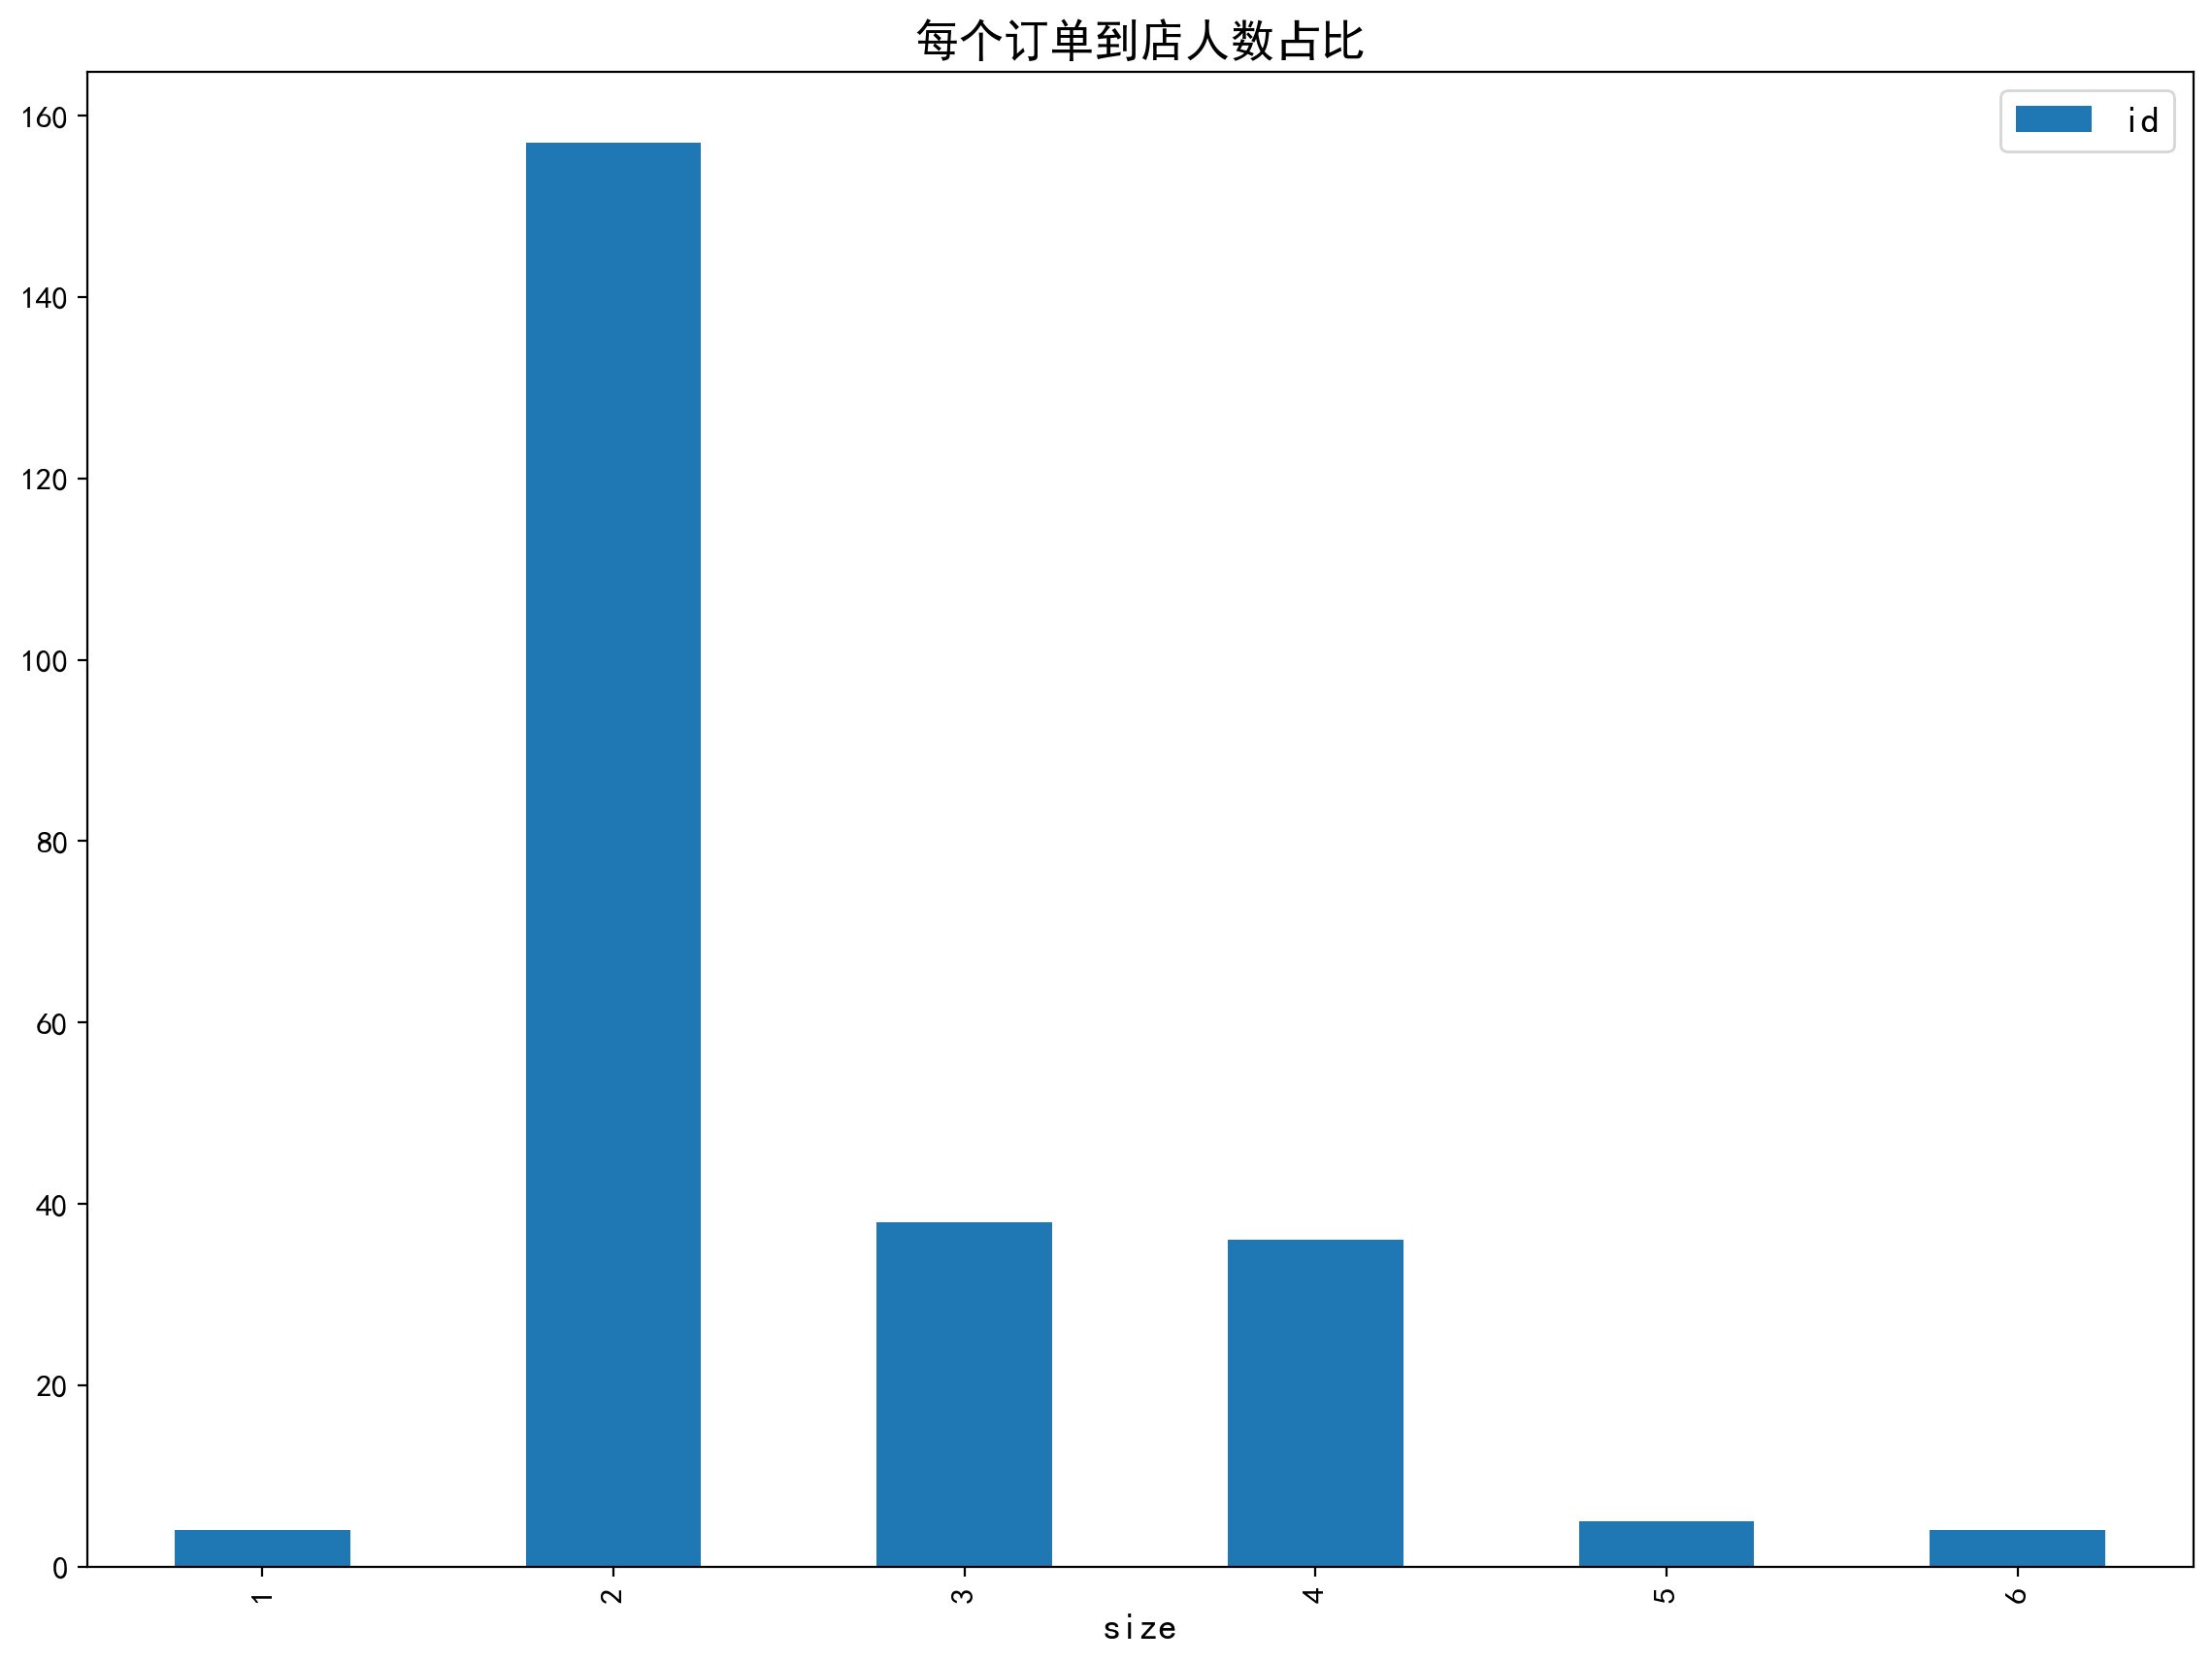

In [17]:
#总结：每个订单单点人数占比直方图
provice_data=data.groupby('size',as_index=False)['id'].count()
provice_data.plot(kind='bar',x='size',y='id',figsize=(14,10),
                  title='每个订单到店人数占比',fontsize=12)
plt.show()

<AxesSubplot: title={'center': '订单到店人数与总消费金额关系'}, xlabel='size', ylabel='total_bill'>

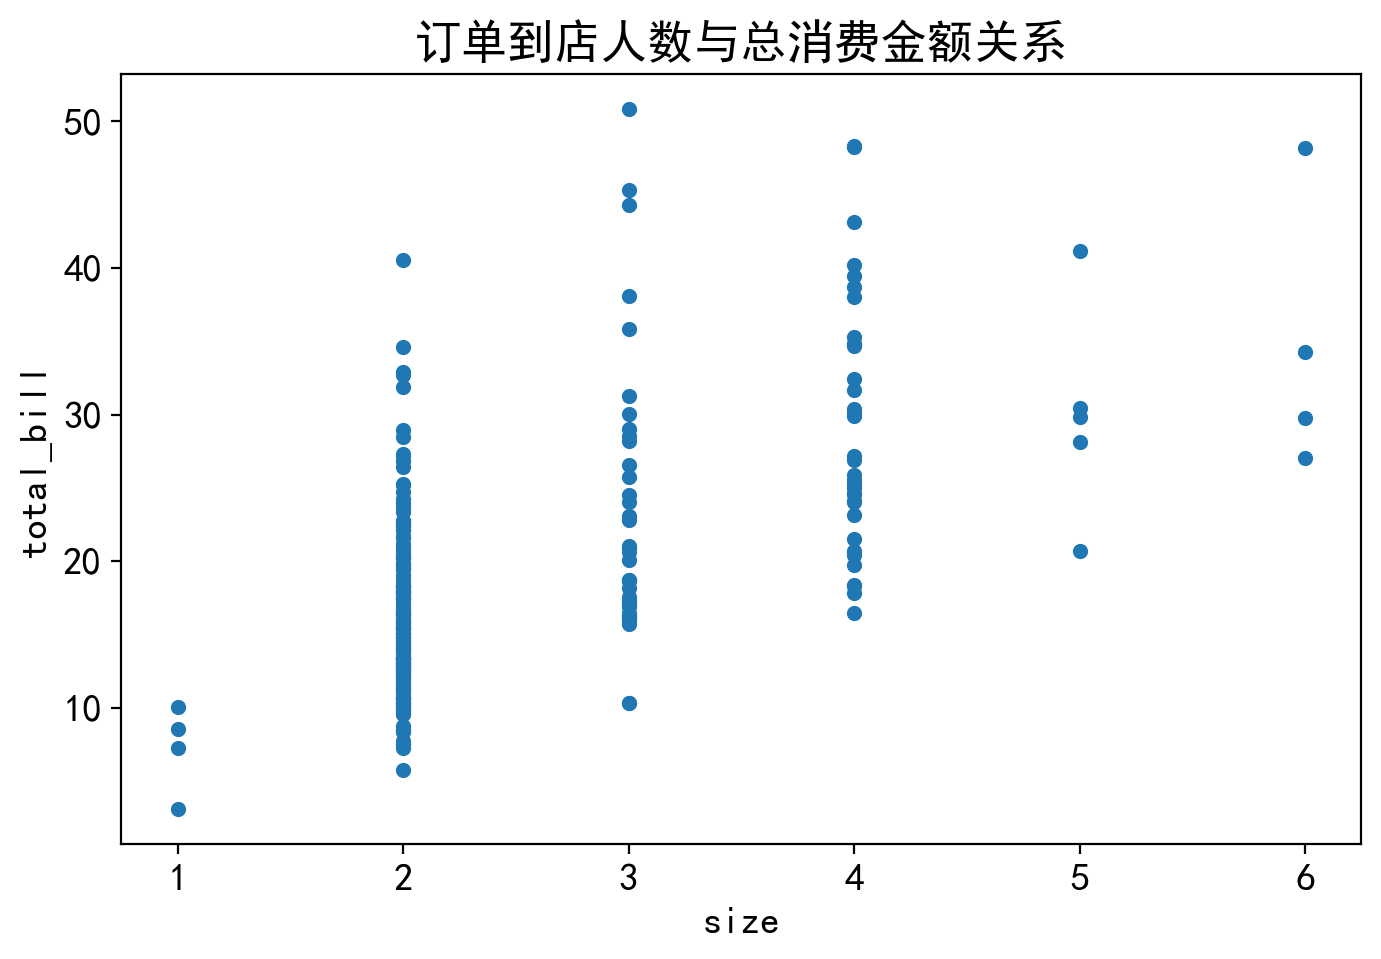

In [18]:
#总结：对比得出到店人数对于消费的起点更高
data = pd.read_csv('tips.csv')
data.plot(kind='scatter',x='size',y='total_bill',figsize=(8,5),title='订单到店人数与总消费金额关系')